# Workshop Tutorial: Posteriors & Parameter Uncertainties

In this tutorial we will focus on posterior probability density functions (pdfs), also known as posteriors. These inform us of the parameter distributions that underlie the topology of the parameter space.

We will not be doing any new computations. Instead, we will use the results from our final round of sampling and interpret them in the context of posterior pdfs.

This interactive workshop tutorial covers many of the same topics as the corresponding online tutorial(s):

* [Advanced: EMCEE Sampler](http://phoebe-project.org/docs/2.3/tutorials/emcee.ipynb)
* [Advanced: Convert Posterior Distributions from EMCEE](http://phoebe-project.org/docs/2.3/tutorials/emcee_distributions_convert.ipynb)

As usual, we do the imports first.

In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

And load the [bundle from the previous tutorial](https://github.com/phoebe-project/phoebe2-workshop/raw/2021june/data/synthetic/after_final_round.bundle):

In [2]:
b = phoebe.load('./data/synthetic/after_final_round.bundle')

/usr/local/lib/python3.9/dist-packages/phoebe/parameters/parameters.py:10382: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self._value = np.array(value)


Let's take a closer look at, say, eccentricity:

In [3]:
print(b['ecc@binary@distribution'])

ParameterSet: 2 parameters
             ecc@ndg@distribution: <distl.gaussian_around scale=0.05 value=0.0 unit= frac=False>
           ecc@ndg_2@distribution: <distl.mvsamplesslice dimension=3 samples=[[7.55230062e+00 7.61449505e-01 2.58317239e+01 1.96882031e-02
  8.06940695e+01]
 [7.57928647e+00 7.84399093e-01 2.44994746e+01 1.94024432e-02
  8.51275857e+01]
 [7.58327084e+00 7.62810186e-01 2.56909837e+01 1.84932649e-02
  8.80474115e+01]
 ...
 [7.71140114e+00 7.75653992e-01 2.49739852e+01 1.22277340e-03
  9.91293825e+01]
 [7.70499290e+00 7.75445667e-01 2.50035115e+01 1.86211453e-03
  9.73527568e+01]
 [7.70632286e+00 7.75591599e-01 2.49967894e+01 1.80641084e-03
  9.93943258e+01]] weights=None bw_method=None unit= label=ecc@binary)>


Why is the final round missing? Because we haven't adopted the solution yet:

In [5]:
b.adopt_solution(solution='final_round',
                 adopt_values=False,
                 adopt_distributions=True,
                 distributions_convert='mvsamples',
                 distribution='ndg_final')

<ParameterSet: 5 parameters | qualifiers: q, ecc, asini, vgamma, per0>

If we print it again, there it is:

In [6]:
print(b['ecc@binary@distribution'])

ParameterSet: 3 parameters
             ecc@ndg@distribution: <distl.gaussian_around scale=0.05 value=0.0 unit= frac=False>
           ecc@ndg_2@distribution: <distl.mvsamplesslice dimension=3 samples=[[7.55230062e+00 7.61449505e-01 2.58317239e+01 1.96882031e-02
  8.06940695e+01]
 [7.57928647e+00 7.84399093e-01 2.44994746e+01 1.94024432e-02
  8.51275857e+01]
 [7.58327084e+00 7.62810186e-01 2.56909837e+01 1.84932649e-02
  8.80474115e+01]
 ...
 [7.71140114e+00 7.75653992e-01 2.49739852e+01 1.22277340e-03
  9.91293825e+01]
 [7.70499290e+00 7.75445667e-01 2.50035115e+01 1.86211453e-03
  9.73527568e+01]
 [7.70632286e+00 7.75591599e-01 2.49967894e+01 1.80641084e-03
  9.93943258e+01]] weights=None bw_method=None unit= label=ecc@binary)>
       ecc@ndg_final@distribution: <distl.mvsamplesslice dimension=3 samples=[[7.69700698e+00 7.75411103e-01 2.49751147e+01 1.98639378e-03
  8.47324658e+01]
 [7.70084088e+00 7.76001618e-01 2.49388159e+01 1.83139857e-03
  8.74492134e+01]
 [7.69710526e+00 7.7556

Now let's take a closer look at the samples, so that we can follow the logic built into phoebe:

In [9]:
print(b['value@ecc@binary@distribution@ndg_final'].samples)

[0.00198639 0.0018314  0.00171208 ... 0.00193904 0.00209296 0.00220871]


This particular structure is an MVSamplesSlice from the distl module. It's always a good idea to acquaint yourself with it first:

In [10]:
help(b['value@ecc@ndg_final@distribution'])

Help on MVSamplesSlice in module phoebe.dependencies.distl.distl object:

class MVSamplesSlice(BaseMultivariateSliceDistribution)
 |  MVSamplesSlice(multivariate, dimension, unit=None, label=None, label_latex=None, wrap_at=None, uniqueid=None)
 |  
 |  Method resolution order:
 |      MVSamplesSlice
 |      BaseMultivariateSliceDistribution
 |      BaseUnivariateDistribution
 |      BaseDistribution
 |      BaseDistlObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  cdf(self, *args, **kwargs)
 |      Expose the cummulative density function (cdf) at values of `x`.
 |      
 |      See [scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.cdf.html)
 |      
 |      This method is just a wrapper around the scipy.stats method on
 |      <<class>.dist_constructor_object> after doing any requested unit-conversions.
 |      
 |      See also:
 |      
 |      * <<class>.logcdf>
 |      * <<class>.pdf>
 |      
 |      Arguments
 |     

Now that we have the samples, we can extract them and plot a histogram:

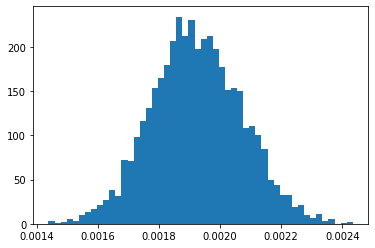

In [11]:
plt.hist(b['value@ecc@binary@distribution@ndg_final'].samples, bins=50)
plt.show()

Excellent! Now let's overplot a gaussian:

In [12]:
mean = b['value@ecc@binary@distribution@ndg_final'].mean()
stdev = b['value@ecc@binary@distribution@ndg_final'].std()
print('Mean: ', mean)
print('Stdev:', stdev)

Mean:  0.0019234390974422193
Stdev: 0.00014797531073293838


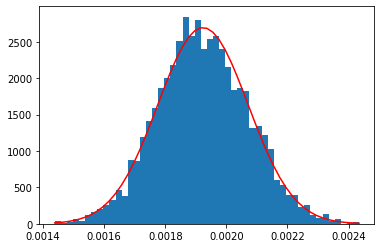

In [13]:
vals, bins, _ = plt.hist(b['value@ecc@binary@distribution@ndg_final'].samples, bins=50, density=True)
uvg = st.norm.pdf(bins, mean, stdev)
plt.plot(bins, uvg, 'r-')
plt.show()

As you can imagine, this functionality is built into phoebe; to see the supported methods, run a `dir` on the sample:

In [14]:
dir(b['value@ecc@binary@distribution@ndg_final'])

['__add__',
 '__and__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__or__',
 '__pow__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_dimension',
 '_dist_constructor_object_cache',
 '_dist_constructor_object_clear_cache',
 '_label',
 '_label_latex',
 '_multivariate',
 '_parents_with_constructor_object_cache',
 '_return_with_units',
 '_uniqueid',
 '_unit',
 '_wrap_at',
 '_xlabel',
 'arccos',
 'arcsin',
 'arctan',
 'arctan2',
 'bw_method',
 'cached_sample',
 'cdf',
 'change_slice_dimension',
 'clear_cached_sample',
 'copy',
 'cos',
 'de

Thus, it is straight-forward to reproduce the above two plots:

In [15]:
ecc_posterior = b['value@ecc@binary@distribution@ndg_final']

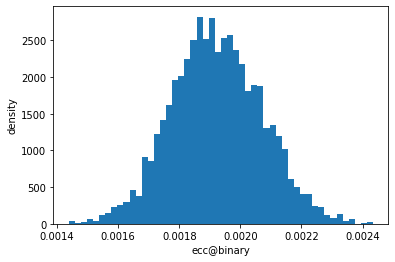

In [16]:
_ = ecc_posterior.plot_sample(bins=50)

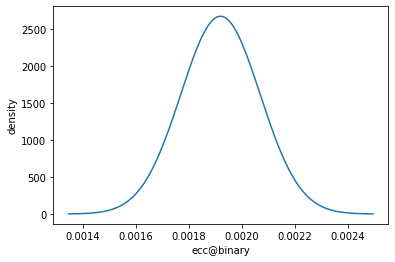

In [17]:
_ = ecc_posterior.plot_gaussian()

We can also use a `plot()` method to combine the plots and make them even nicer:

In [18]:
help(ecc_posterior.plot)

Help on method plot in module phoebe.dependencies.distl.distl:

plot(size=100000.0, unit=None, wrap_at=None, seed=None, samples=None, plot_sample=True, plot_sample_kwargs={'color': 'gray'}, plot_pdf=True, plot_pdf_kwargs={'color': 'red'}, plot_cdf=False, plot_cdf_kwargs={'color': 'green'}, plot_gaussian=False, plot_gaussian_kwargs={'color': 'blue'}, plot_uncertainties=True, plot_uncertainties_kwargs={'color': 'black', 'linestyle': 'dashed'}, label=None, xlabel=None, show=False, **kwargs) method of phoebe.dependencies.distl.distl.MVSamplesSlice instance
    Plot both the analytic distribution function as well as a sampled
    histogram from the distribution.  Requires matplotlib to be installed.
    
    See also:
    
    * <<class>.plot_sample>
    * <<class>.plot_pdf>
    * <<class>.plot_cdf>
    * <<class>.plot_gaussian>
    
    Arguments
    -----------
    * `size` (int, optional, default=1e5): number of points to sample for
        the histogram.  See also <<class>.sample>.  Wil

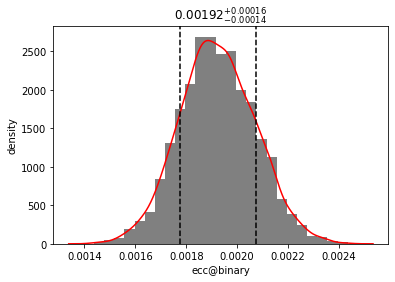

In [19]:
_ = ecc_posterior.plot(plot_pdf=True)

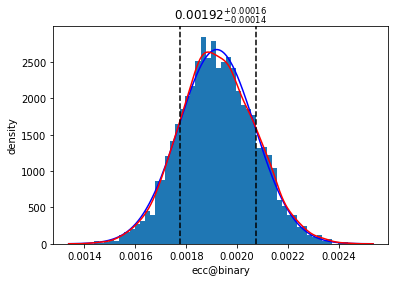

In [20]:
_ = ecc_posterior.plot(plot_sample=True, plot_sample_kwargs={'bins': 50}, plot_gaussian=True, plot_uncertainties=True)

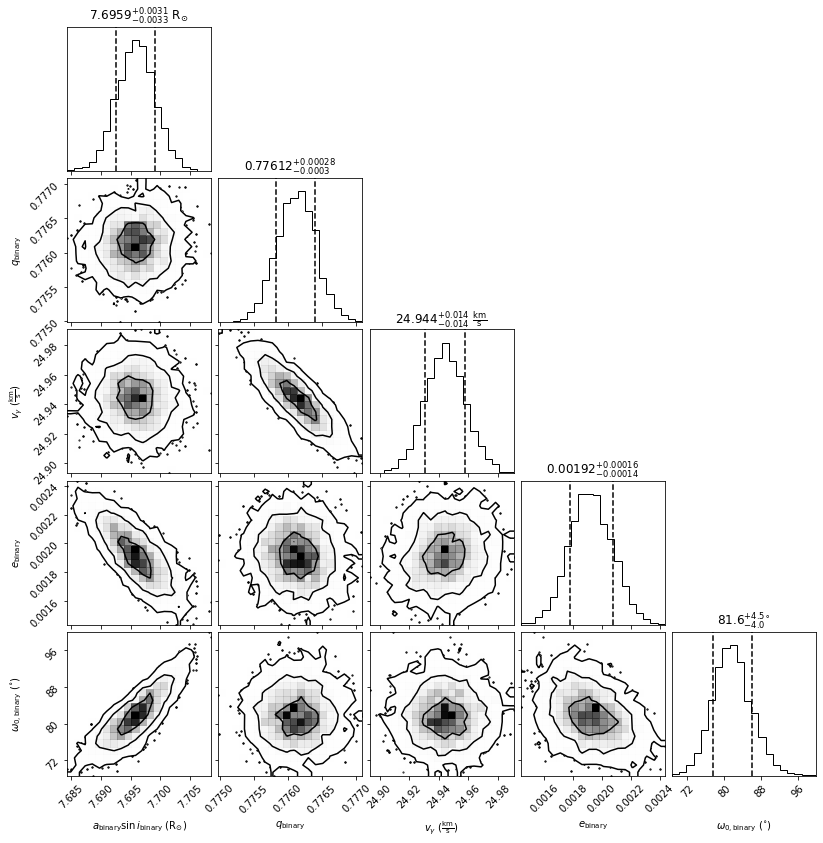

In [21]:
_ = b.plot_distribution_collection('ndg_final')

And finally, we can convert distributions to multivariate gaussians, thus "polishing" the posteriors:

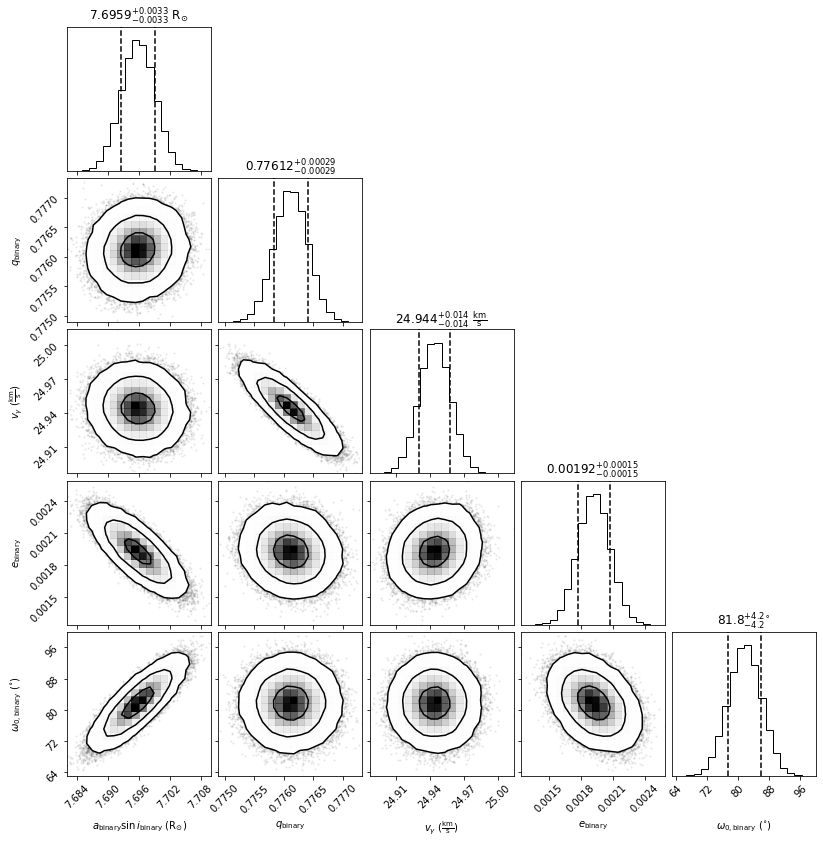

In [22]:
_ = b.plot('final_round', style='corner', distributions_convert='mvgaussian')

# Exercises

**Exercise 1**: We used the posterior on eccentricity to discuss what phoebe can do for us. Now run the same type of analysis on other parameters.